-- Starbucks Data Analysis Project --

Prepared by: Emre Tutunculer



In this study, I used Starbucks' store data and analyzed it. The main objective was to improve my skills and to demonstrate my skills in using the Pandas, NumPy, Scikit, Matplotlib, pycountry, and plotlyexpress libraries.

**Key focus areas on this project are:**

1- Analyzing how Starbucks' coffee shops are spread across US, EU, and Turkey.

2- Observing how Starbucks coffee shops are located across U.S. States.


**Key findings of this project are:**

1- The United States is the leading country in the number of stores that Starbucks has.

2- In EU, Germany(DEN) is the leading country in terms of store count.

3- As Tea consumption per capita increases, number of Starbucks coffee shop generally decreases.

4- As the outcome of LinearRegression, per capita consumption affects the number of Starbucks store by 30%.

*Last section of this project is inspired from the project done by ***Nuriel Reuven*** -- a kaggle user.*


https://www.kaggle.com/code/nurielreuven/starbucks-locations-analysis-and-prediction



Tea Consumption Per Capita data is taken from ***Statista***.


https://www.statista.com/statistics/507950/global-per-capita-tea-consumption-by-country/

**SECTION 1 - Importing the necessary libraries and first look to the Data**

---



In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install plotly-express


In [ ]:
#!pip3 install pycountry_convert

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly_express as px
import pycountry as pc
import pycountry_convert as pcc
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Data_from_projects/Starbucks_project/directory.csv')

In [ ]:
#First look to the data
df.head(10)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
5,Starbucks,17688-182164,"Dalma Mall, Ground Floor",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
6,Starbucks,18182-182165,"Dalma Mall, Level 1",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
7,Starbucks,23359-229184,Debenhams Yas Mall,Licensed,Yas Island,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.61,24.46
8,Starbucks,30781-99022,Khalidiya Street,Licensed,Khalidiya St.,Abu Dhabi,AZ,AE,NaN,26670052,GMT+04:00 Asia/Muscat,55.69,24.19
9,Starbucks,20423-205465,Eastern Mangroves,Licensed,"Al Salam Street, The Mangroves",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48


In [ ]:
#Checking which columns the data include.
list[df.columns]

list[Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')]

In [ ]:
#Checking the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


**Insight extraction from Data**

---



In [ ]:
## How many stores Starbucks have in each country?
import pprint
country_count = {}

for country in df['Country']:
  country_count.setdefault(country,0)
  country_count[country] = country_count[country] + 1

pprint.pprint(country_count)


{'AD': 1,
 'AE': 144,
 'AR': 108,
 'AT': 18,
 'AU': 22,
 'AW': 3,
 'AZ': 4,
 'BE': 19,
 'BG': 5,
 'BH': 21,
 'BN': 5,
 'BO': 4,
 'BR': 102,
 'BS': 10,
 'CA': 1468,
 'CH': 61,
 'CL': 96,
 'CN': 2734,
 'CO': 11,
 'CR': 11,
 'CW': 3,
 'CY': 10,
 'CZ': 28,
 'DE': 160,
 'DK': 21,
 'EG': 31,
 'ES': 101,
 'FI': 8,
 'FR': 132,
 'GB': 901,
 'GR': 28,
 'GT': 7,
 'HU': 16,
 'ID': 268,
 'IE': 73,
 'IN': 88,
 'JO': 17,
 'JP': 1237,
 'KH': 4,
 'KR': 993,
 'KW': 106,
 'KZ': 8,
 'LB': 29,
 'LU': 2,
 'MA': 9,
 'MC': 2,
 'MX': 579,
 'MY': 234,
 'NL': 59,
 'NO': 17,
 'NZ': 24,
 'OM': 12,
 'PA': 5,
 'PE': 89,
 'PH': 298,
 'PL': 53,
 'PR': 24,
 'PT': 11,
 'QA': 18,
 'RO': 27,
 'RU': 109,
 'SA': 102,
 'SE': 18,
 'SG': 130,
 'SK': 3,
 'SV': 11,
 'TH': 289,
 'TR': 326,
 'TT': 3,
 'TW': 394,
 'US': 13608,
 'VN': 25,
 'ZA': 3}


In [ ]:
#Which country has the most stores?
sorted_country = sorted(country_count.items(), key = lambda x: x[1], reverse = True)

In [ ]:
## How many different countries that Starbucks have a store?
diff_country = len(country_count.keys())
diff_country

73

In [ ]:
## What are the stores in Turkey?
df.groupby(['Country']).get_group('TR')

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
11241,Starbucks,3165-143231,Starbucks,Licensed,"Yeni Mah. Ogretmenler Bulv. M1 Merkez, Alisver...",Adana,1,TR,1000,322 2710457,GMT+2:00 Asia/Istanbul,35.24,37.02
11242,Starbucks,3030-142267,Starbucks,Licensed,"Kurtulus Mah. Ziya Pasa Bulv. Ali Sadi, Apt. N...",Adana,1,TR,1130,0 322 457 94 95,GMT+2:00 Asia/Istanbul,35.32,37.00
11243,Starbucks,1942-139246,Starbucks,Licensed,Incirlik Ussu 10. Sencer Komutanligi,Adana,1,TR,1220,NaN,GMT+2:00 Asia/Istanbul,35.44,37.00
11244,Starbucks,6130-149624,Starbucks,Licensed,"Guzelyali Mah.Kenan Evren Bulv., No: 105/B",Adana,1,TR,1170,0322 235 21 26,GMT+2:00 Asia/Istanbul,35.30,37.05
11245,Starbucks,23681-232564,Starbucks,Licensed,"Guzelyali Mah. Turgut Ozal Bulvari No:44, Cuku...",Adana,1,TR,1170,NaN,GMT+2:00 Asia/Istanbul,35.30,37.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11562,Starbucks,47202-257209,Adapazari Agora,Licensed,"Arabacialani Mah. Eski Kazim No 10,, Kasim Pas...",Sakarya,54,TR,54050,NaN,GMT+2:00 Asia/Istanbul,30.37,40.78
11563,Starbucks,25765-242368,Serdivan,Licensed,"Arabaci Alani Mah. Mert Sok., No:25/A zemin k...",Sakarya,54,TR,54050,NaN,GMT+2:00 Asia/Istanbul,30.37,40.78
11564,Starbucks,48956-265970,Ellialtilar,Licensed,"Istiklal Cd No 186, Bahcelievler Mah. Ilkadim",Samsun,55,TR,55070,NaN,GMT+2:00 Asia/Istanbul,36.34,41.28
11565,Starbucks,19212-199664,Starbucks,Licensed,"Yeni Mah. Eski Otogar Mevki Çarsamba, Cad. Pia...",Samsun,55,TR,55080,0 362 290 1760,GMT+2:00 Asia/Istanbul,36.35,41.28


In [ ]:
## What are the stores in the capital city of Turkey and their code?
df[(df['Country'] == 'TR') & (df['City'] == 'Ankara')]

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
11251,Starbucks,16539-156846,Starbucks,Licensed,"Gazi Mustafa Kemal Bulv. Kizilay, Alisveris Me...",Ankara,6,TR,6900,0 312 417 02 26,GMT+2:00 Asia/Istanbul,32.85,39.92
11252,Starbucks,42518-96134,Starbucks,Licensed,"1597.Cad. Bilkent Center No:3 K:Giris, Bilkent",Ankara,6,TR,6800,0 312 266 42 25,GMT+2:00 Asia/Istanbul,32.76,39.88
11253,Starbucks,31706-110204,Starbucks,Licensed,"Yukari Bahcelievler Mah. 7 Cad. No:28/A, Bahce...",Ankara,6,TR,6490,312 2157552,GMT+2:00 Asia/Istanbul,32.83,39.92
11254,Starbucks,27598-248084,Dora Park,Licensed,"Cay Yolu 1 Mahallesi, 2846., Sok 51 Ada 1 no'l...",Ankara,6,TR,6810,NaN,GMT+2:00 Asia/Istanbul,32.76,39.90
11255,Starbucks,19734-197185,Starbucks,Licensed,"Konya Yolu Mevlana Bulv. Taurus Ankara, Alisve...",Ankara,6,TR,6105,NaN,GMT+2:00 Asia/Istanbul,32.81,39.89
11256,Starbucks,16016-167506,Starbucks,Licensed,"Ovacik Mah. Yozgat Bulv. Forum Ankara, Outlet ...",Ankara,6,TR,6290,0312 578 08 10,GMT+2:00 Asia/Istanbul,32.82,40.02
11257,Starbucks,32479-131561,Starbucks,Licensed,"Istanbul Yolu 5 Km Fatih Sultan Mehmet, Bulv A...",Ankara,6,TR,6900,312 3874347,GMT+2:00 Asia/Istanbul,32.76,39.95
11258,Starbucks,50076-272732,Bilkent GSF,Licensed,"Universiteler Mah. Bilkent, University Fine Ar...",Ankara,6,TR,6800,NaN,GMT+2:00 Asia/Istanbul,32.75,39.87
11259,Starbucks,3029-140428,Starbucks,Licensed,Oran Mah. Turan Gunes Bulv. No:19,Ankara,6,TR,6450,+90.312 438 669,GMT+2:00 Asia/Istanbul,32.86,39.88
11260,Starbucks,27825-248829,Sinpas Altinoran,Licensed,"Turan Gunes Bulvari Altinoran No:54, (MSB Lojm...",Ankara,6,TR,6550,NaN,GMT+2:00 Asia/Istanbul,32.86,39.87


In [ ]:
## How did the stores spread across Turkey?
df_stores_TR = df.where(df['Country'] == 'TR').City.value_counts()
df_stores_TR = df_stores_TR.to_dict()

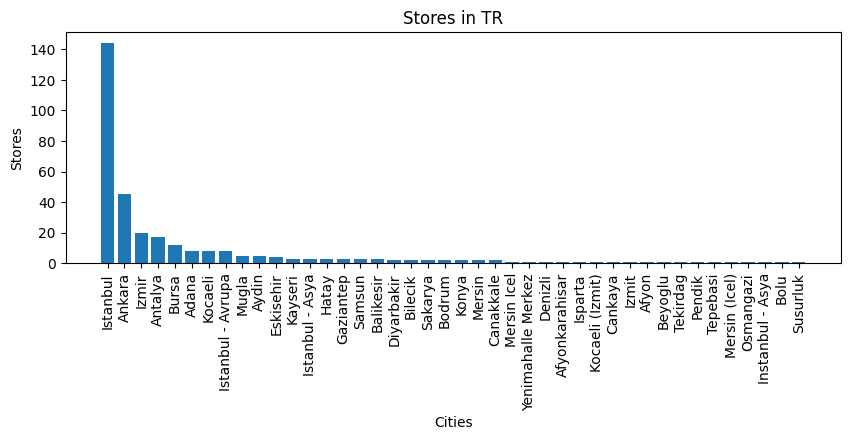

In [ ]:
x_axis = df_stores_TR.keys()
y_axis = df_stores_TR.values()

plt.figure(figsize=(10, 3))
plt.bar(x_axis,y_axis)
plt.title('Stores in TR')
plt.xlabel("Cities")
plt.ylabel('Stores')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## How starbucks stores spread in US and which state has the most Starbucks store?
df_us = df[df['Country'] == 'US']['State/Province'].value_counts().to_dict()
df_us

{'CA': 2821,
 'TX': 1042,
 'WA': 757,
 'FL': 694,
 'NY': 645,
 'IL': 575,
 'AZ': 488,
 'CO': 481,
 'VA': 432,
 'OH': 378,
 'OR': 359,
 'PA': 357,
 'NC': 338,
 'GA': 326,
 'MI': 283,
 'MA': 273,
 'NJ': 261,
 'MD': 257,
 'NV': 253,
 'IN': 221,
 'MO': 188,
 'MN': 184,
 'TN': 180,
 'WI': 145,
 'SC': 131,
 'CT': 123,
 'KY': 116,
 'UT': 101,
 'HI': 99,
 'KS': 94,
 'DC': 91,
 'IA': 89,
 'AL': 85,
 'LA': 84,
 'OK': 79,
 'NM': 76,
 'ID': 67,
 'NE': 58,
 'AR': 55,
 'AK': 49,
 'MT': 36,
 'MS': 32,
 'ME': 30,
 'NH': 29,
 'RI': 27,
 'SD': 25,
 'DE': 25,
 'WV': 25,
 'WY': 23,
 'ND': 13,
 'VT': 8}

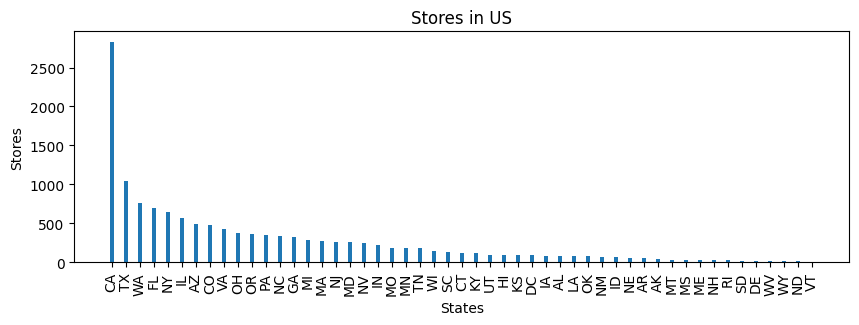

In [ ]:
## Visualize how stores are spread across the country(USA)?
x_axis = df_us.keys()
y_axis = df_us.values()

plt.figure(figsize=(10, 3))
plt.bar(x_axis,y_axis, width = 0.3, align = 'center')
plt.title('Stores in US')
plt.xlabel("States")
plt.ylabel('Stores')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## How many stores are in Europe?
european_cc = ['BE','EL','LT','PT',
	'BG','ES','LU','RO',
	'CZ','FR','HU','SI',
	'DK','HR','MT','SK',
	'DE','IT','NL','FI',
	'EE','CY','AT','SE',
	'IE','LV','PL']

print(european_cc)


['BE', 'EL', 'LT', 'PT', 'BG', 'ES', 'LU', 'RO', 'CZ', 'FR', 'HU', 'SI', 'DK', 'HR', 'MT', 'SK', 'DE', 'IT', 'NL', 'FI', 'EE', 'CY', 'AT', 'SE', 'IE', 'LV', 'PL']


In [ ]:
european_count = {}
for i in european_cc:
  if i in country_count.keys():
    european_count[i] = country_count[i]
print(f"Total number of Starbucks stores in Europe is: {sum(european_count.values())}")

Total number of Starbucks stores in Europe is: 764


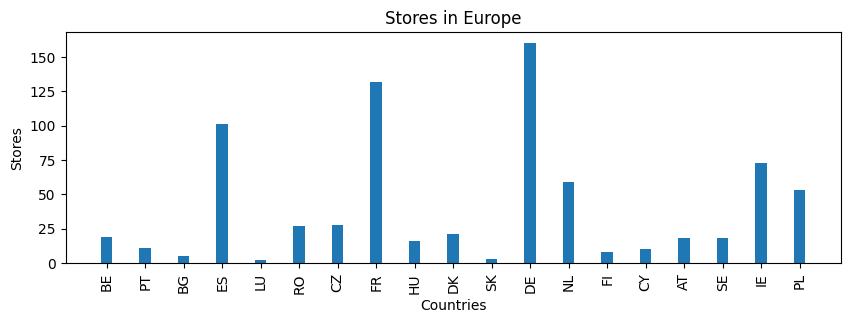

In [ ]:
## Graphically show how stores are spreaded in Europe

x_axis = european_count.keys()
y_axis = european_count.values()

plt.figure(figsize=(10, 3))
plt.bar(x_axis,y_axis, width = 0.3, align = 'center')
plt.title('Stores in Europe')
plt.xlabel("Countries")
plt.ylabel('Stores')
plt.xticks(rotation=90)
plt.show()

Madrid                        47
Barcelona                     20
Malaga                         5
Sevilla                        4
Valencia                       4
Alicante                       2
Mijas Costa                    1
Palma                          1
San Sebastian                  1
Murcia                         1
Torrelodones                   1
San Sebastian de los Reyes     1
Majadahonda                    1
MADRID                         1
Las Tablas - Madrid            1
Palm                           1
Manises                        1
Malanga                        1
Telde                          1
Aldaia                         1
A CORUNA                       1
A Coruna                       1
Loiu                           1
Bilbao                         1
Zargoza                        1
Name: City, dtype: int64


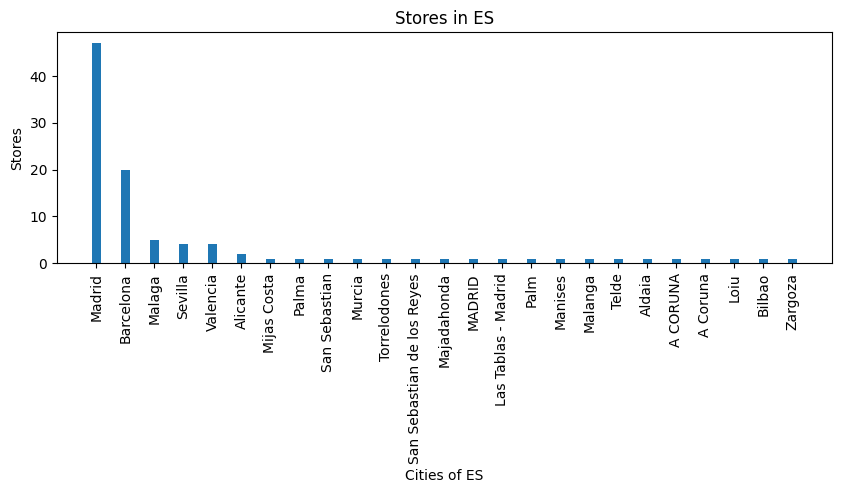

None


In [ ]:
## Displaying the Starbucks stores in a country with defining a class.
class Starbucks:
  def __init__(self,name):
    self.name = name

  def get_stores(self):

    df_country_name = df.where(df['Country'] == self.name).City.value_counts()
    return df_country_name

  def get_visualize(self):
    df_visualize = df[df['Country'] == self.name].City.value_counts().to_dict()

    x_axis = df_visualize.keys()
    y_axis = df_visualize.values()

    plt.figure(figsize=(10, 3))
    plt.bar(x_axis,y_axis, width = 0.3, align = 'center')
    plt.title(f'Stores in {self.name}')
    plt.xlabel(f"Cities of {self.name}")
    plt.ylabel('Stores')
    plt.xticks(rotation=90)
    plt.show()



store_es = Starbucks('ES')
print(store_es.get_stores())
print(store_es.get_visualize())

In [ ]:
wwspread = px.scatter_geo(df, lat='Latitude', lon='Longitude' , hover_name='Store Name' , size_max = 10 , title='Starbucks Coffee - Worldwide')
wwspread.show()

In [ ]:
us_stores = df.query('Country == "US"')
us_stores_map = px.scatter_geo(us_stores , locationmode = 'USA-states' ,scope='usa' , lat='Latitude', lon='Longitude' , hover_name='Store Name' , size_max = 10 , title='Starbucks locations United States')
us_stores_map.show()

**SECTION - 2 Relationship between Tea Consumption Per Capita and Number of Starbucks Stores.**

---



In [ ]:
#Reading the tea consumption Per Capita data.
tea_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Data_from_projects/Starbucks_project/statistic_id507950_global-per-capita-tea-consumption-as-of-2016-by-country.xlsx')

tea_df = tea_df.rename(columns = {'Usage' : 'Total_tea(p/c)'})

In [ ]:
#Checking again if the columns that i will use include any missing values.
df.isna().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [ ]:
#Dropping some unnecessary columns.

df.drop(axis=1 , columns=['Store Number','Postcode','Phone Number','Timezone'] , inplace=True)
df.sample(3)

,Brand,Store Name,Ownership Type,Street Address,City,State/Province,Country,Longitude,Latitude
7597,Starbucks,AEON MALL Kuwana,Joint Venture,1-22 Shinnishikata,Kuwana,24,JP,136.66,35.07
11085,Starbucks,B2S (Chidlom2),Company Owned,"1027, 7th Flr Central Chidlom Dept Store, Ploe...",Patumwan,10,TH,100.54,13.74
21456,Starbucks,"Syracuse University, Campus West Ho",Licensed,"150 Henry Street, Campus West Housing",Syracuse,NY,US,-76.14,43.04


In [ ]:
#Before merge, preparing the data by using the pycountry data which helps me correcting and explicitly displaying the country names.
##The following code is inspired by the Kaggle user mentioned above.
df['Country_ISO'] = df['Country']
df['Country'] = df['Country'].apply(lambda country: pc.countries.get(alpha_2=country).name)
df['Continent'] = df['Country_ISO'].apply(lambda country: pcc.country_alpha2_to_continent_code(country)).apply(lambda cont: pcc.convert_continent_code_to_continent_name(cont))
df.sample(5)

,Brand,Store Name,Ownership Type,Street Address,City,State/Province,Country,Longitude,Latitude,Country_ISO,Continent
24087,Starbucks,Clearfield - Falcon Hill,Company Owned,"306 East 650 North, 106, Clinton Pines",Clearfield,UT,United States,-112.02,41.12,US,North America
15575,Starbucks,King Soopers-Colorado Springs #130,Licensed,3650 Austin Bluff Pkwy,Colorado Springs,CO,United States,-104.76,38.89,US,North America
11073,Starbucks,Bangkok Mediplex,Company Owned,"Mediplex building, No. 2, Sukhumvit 42 road",Klongtoey,10,Thailand,100.58,13.72,TH,Asia
18202,Starbucks,Martins-Mishawaka #12,Licensed,"306 N Bittersweet, University Park",Mishawaka,IN,United States,-86.11,41.67,US,North America
16683,Starbucks,Cordova Mall - First Level,Company Owned,"5100 North 9th Avenue, H818",Pensacola,FL,United States,-87.21,30.47,US,North America


In [ ]:
df.sample(5)

,Brand,Store Name,Ownership Type,Street Address,City,State/Province,Country,Longitude,Latitude,Country_ISO,Continent
7673,Starbucks,Vivamall Neyagawa,Joint Venture,2-22-2 Neyaminami,Neyagawa,27,Japan,135.65,34.77,JP,Asia
2964,Starbucks,歌斐中心店,Joint Venture,"上海市黄浦区, 南京东路299号",上海市,31,China,121.48,31.20,CN,Asia
24228,Starbucks,Virginia Square Metro,Company Owned,"901 North Nelson Street, 120",Arlington,VA,United States,-77.10,38.88,US,North America
16819,Starbucks,Westshore & Kennedy,Company Owned,118 South Westshore Blvd,Tampa,FL,United States,-82.52,27.94,US,North America
24253,Starbucks,Burke Commons,Company Owned,6003-A Burke Centre Pkwy,Burke,VA,United States,-77.30,38.79,US,North America


In [ ]:
#Last step before merge, getting the only column that will be used for LinearRegression.
#The following code is inspired by the Kaggle user mentioned above.

x = pd.DataFrame(df['Country'].value_counts().rename('Coffee_stores_count'))
x.reset_index(inplace=True)
x.rename(columns = {'index' : 'Country'} , inplace=True)
tea_df = tea_df.merge(x , on='Country')



In [ ]:
tea_df

,Country,Total_tea(p/c),Coffee_stores_count
0,Turkey,6.96,326
1,Ireland,4.83,73
2,United Kingdom,4.28,901
3,New Zealand,2.63,24
4,Egypt,2.23,31
5,Poland,2.20,53
6,Japan,2.13,1237
7,Saudi Arabia,1.98,102
8,South Africa,1.79,3
9,Netherlands,1.72,59


<Axes: title={'center': 'No. of stores vs. Per capita tea consumption'}, xlabel='Total_tea(p/c)', ylabel='Coffee_stores_count'>

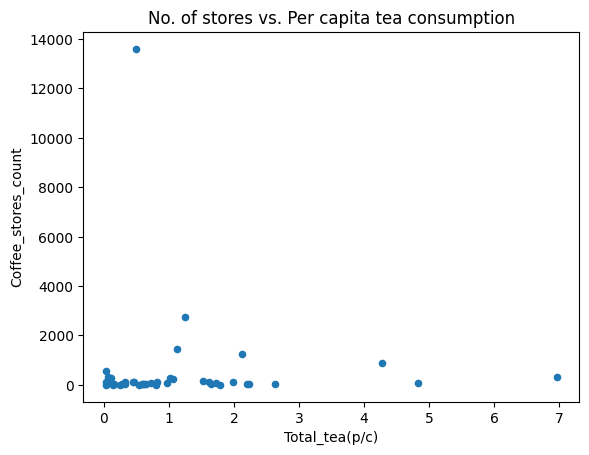

In [ ]:
## Now, we will try to observe the relationship between per capita tea consumption and number of Starbucks store.

tea_df.plot(kind = 'scatter' , x= 'Total_tea(p/c)', y ='Coffee_stores_count',
            title='No. of stores vs. Per capita tea consumption')

## As can be seen, as total tea consumption per capita increases, number of stores *Generally* decreases.

In [ ]:
# Setting the X and Y variables to be able to use in LinearRegression
# Y is used as the 'Label'

y = tea_df['Total_tea(p/c)']
x = tea_df['Coffee_stores_count']


In [ ]:
# Using LinearRegression
# NumPy is used to reshape the data since data is very small.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 123)
reg = LinearRegression()
model = reg.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

In [ ]:
# Checking the intercept variable

model.intercept_

array([1.00332423])

In [ ]:
# Checking the value of the coefficient

model.coef_

array([[0.00042294]])

In [ ]:
# Checking the overall score of the model

model.score(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

0.02716753905354896

**Total_tea**(p/c) = 1 + 0.0004 x **Coffee_Stores_Count**